<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/a01139500_m2_retro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework

In [177]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
'Colab Notebooks'	 iris.data	     real_estate.csv    Valhalla23.csv
'Documentos utiles'	 iris.names	     real_state.csv     wine.data
 EBSCO			 LiFE		    'Servicio Social'   wine.names
 EGSGLP			'Plan de estudios'  'Sin ordenar'
 Fotos			 PlayDataset.csv     test.csv
 gender_submission.csv	 Portugues	     train.csv


Se importan las librerías necesarias. sklearn solo se usa para hacer la división de datos de entrenamiento y prueba.

In [178]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Se importa el CSV, se da nombre a las columnas, y se 

In [179]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
df["clase1"] = df["index"]==1
df["clase1"] = df["clase1"].astype(int)
df["clase2"] = df["index"]==2
df["clase2"] = df["clase2"].astype(int)
df["clase3"] = df["index"]==3
df["clase3"] = df["clase3"].astype(int)
df

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,clase1,clase2,clase3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


Visualización binaria de datos

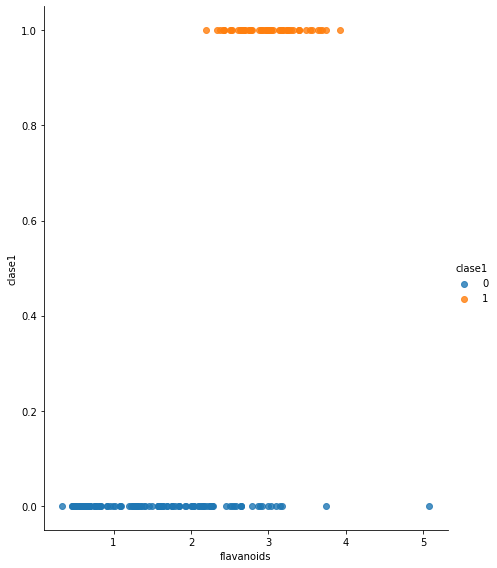

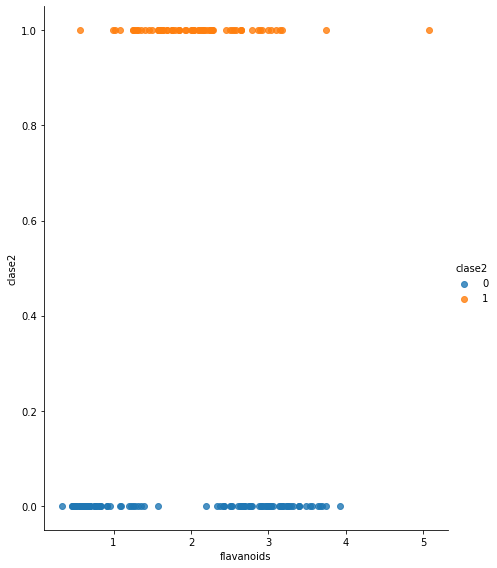

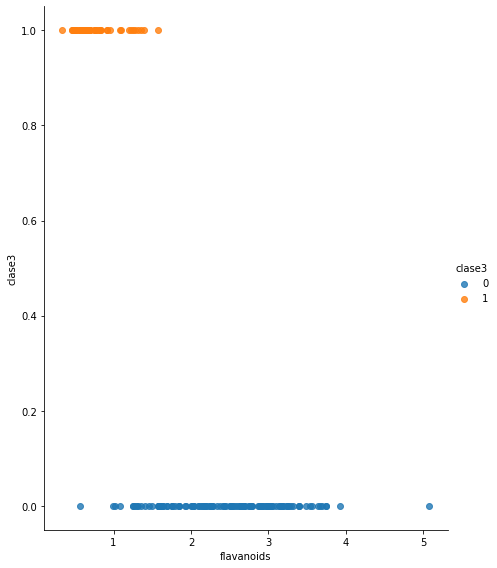

In [180]:
sns.lmplot(x='flavanoids',
           y='clase1',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase1', 
           legend=True)
sns.lmplot(x='flavanoids',
           y='clase2',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase2', 
           legend=True)
sns.lmplot(x='flavanoids',
           y='clase3',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase3', 
           legend=True)

Se selecciona el tipo de clase que se busca clasificar



In [183]:
# por favor seleccione la columna cambiando el titulo de la columna


# se hace la división entre datos de prueba y datos de 

x_train1, x_test1, y_train1, y_test1 = train_test_split(df["flavanoids"], df['clase1'], test_size=0.33, random_state=0)
funcion_de_clasificacion(x_train1, x_test1, y_train1, y_test1)

print('---------')

# se hace la división entre datos de prueba y datos de 

x_train2, x_test2, y_train2, y_test2 = train_test_split(df["flavanoids"], df['clase2'], test_size=0.33, random_state=0)
funcion_de_clasificacion(x_train2, x_test2, y_train2, y_test2)

print('---------')

x_train3, x_test3, y_train3, y_test3= train_test_split(df["flavanoids"], df['clase3'], test_size=0.33, random_state=0)
funcion_de_clasificacion(x_train3, x_test3, y_train3, y_test3)

[0.7943977874705679, 0.5557343238684744]
J test
 1.472147549627509
J entrenamiento 
 1.294753740492796
theta 
 [0.7943977874705679, 0.5557343238684744]
---------
[0.8025090337098398, 0.5388787728681362]
J test
 1.4365217722465862
J entrenamiento 
 1.3424029720697839
theta 
 [0.8025090337098398, 0.5388787728681362]
---------
[0.7958402202112983, 0.4951928532713008]
J test
 1.6766183361491394
J entrenamiento 
 1.5003979787688166
theta 
 [0.7958402202112983, 0.4951928532713008]


Se presenta la funcion a la que se le da como input la clase que se busca clasificar.

In [182]:
def funcion_de_clasificacion(x_train, x_test, y_train, y_test):
  
  # se hace una regresión logistica de orden 1

  h   = lambda x,theta: theta[0]+theta[1]*x
  j_i = lambda x,y,theta: (y-h(x,theta))**2 

  alpha = 0.00001

  n = len(y_train)

  theta = [1,1] # Cambiar dependiendo del orden del modelo (un theta para cada dimensión de nuestros datos + 1)

  for idx in range(10000):
    acumDelta = []
    acumDeltaX = []
    for x_i, y_i in zip(x_train,y_train):
      acumDelta.append(h(x_i,theta)-y_i)
      acumDeltaX.append((h(x_i,theta)-y_i)*x_i)

    sJt0 = sum(acumDelta)
    sJt1 = sum(acumDeltaX)
    theta[0] = theta[0]-alpha/n*sJt0
    theta[1] = theta[1]-alpha/n*sJt1

  print(theta)

  n_train = len(y_train)
  n_test = len(y_test)

  # Validación
  acumDelta = []
  for x_i, y_i in zip(x_test,y_test):
    acumDelta.append(j_i(x_i,y_i,theta))  

  sDelta = sum(acumDelta)  
  J_test = 1/(2*n_test)*sDelta


  # Training
  acumDelta = []
  for x_i, y_i in zip(x_train,y_train):
    acumDelta.append(j_i(x_i,y_i,theta)) 

  sDelta = sum(acumDelta)
  J_train = 1/(2*n_train)*sDelta

  print("J test\n", J_test)
  print("J entrenamiento \n",J_train)
  print("theta \n",theta)

In [192]:
## se tomaron las thetas del disp.

theta1 = [0.7943977874705679,0.5557343238684744]; theta2 = [0.8025090337098398,0.5388787728681362]; theta3 = [0.7958402202112983,0.4951928532713008];

## se hace una matriz con los valores 

comparacion1 = np.array(theta1[0]+theta1[1]*x_train1)
comparacion2 = np.array(theta2[0]+theta2[1]*x_train2)
comparacion3 = np.array(theta3[0]+theta3[1]*x_train3)

comparacion_train = {'t1': comparacion1.transpose(),'t2': comparacion2.transpose(),'t3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex = df2_train.idxmax(axis = 1)
print(maxValueIndex)

comparacion1 = np.array(theta1[0]+theta1[1]*x_test1)
comparacion2 = np.array(theta2[0]+theta2[1]*x_test2)
comparacion3 = np.array(theta3[0]+theta3[1]*x_test3)

comparacion_train = {'t1': comparacion1.transpose(),'t2': comparacion2.transpose(),'t3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex = df2_train.idxmax(axis = 1)
print(maxValueIndex)

0      t1
1      t1
2      t1
3      t1
4      t1
       ..
114    t1
115    t1
116    t1
117    t1
118    t1
Length: 119, dtype: object
0     t1
1     t1
2     t1
3     t1
4     t1
5     t1
6     t1
7     t1
8     t1
9     t1
10    t1
11    t2
12    t1
13    t1
14    t1
15    t1
16    t1
17    t1
18    t1
19    t1
20    t1
21    t1
22    t1
23    t1
24    t1
25    t1
26    t1
27    t1
28    t1
29    t1
30    t1
31    t1
32    t1
33    t1
34    t1
35    t1
36    t1
37    t1
38    t1
39    t1
40    t1
41    t1
42    t1
43    t1
44    t1
45    t1
46    t1
47    t1
48    t1
49    t1
50    t1
51    t2
52    t1
53    t1
54    t1
55    t1
56    t1
57    t1
58    t1
dtype: object


## Matriz de confusión

Se presenta la matriz de confusión con base en los valores obtenidos de las pruebas.